<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Данные для создания дашборда

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Задаём параметры подключения к БД,их можно узнать у администратора БД.
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных.
# Формируем строку соединения с БД.

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])
# Подключаемся к БД.
engine = create_engine(connection_string) 

In [4]:
query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [5]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [6]:
dash_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


Итак, датафрейм dash_visits, предоставляет данные следующих групп:

record_id - уникальный номер записи;

item_topic - тема карточки;

source_topic - тема источника;

age_segment - возрастная категория;

dt - фиксация даты и времени визита;

visits - количество посещений.

Всего 30745 записей, пропусков нет, 6 колонок. Типы данных устраивают, замена не требуется.

## Исследование данных

In [7]:
# Проверим дубликаты:
dash_visits.duplicated().sum()

0

In [8]:
# 1
dash_visits['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

In [9]:
dash_visits['item_topic'].nunique()

25

Всего описываются карточки 25 тематик.

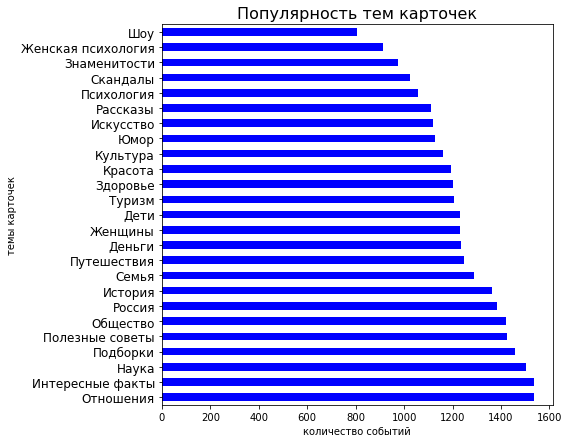

In [10]:
# визуализация
dash_visits['item_topic'].value_counts().sort_values(ascending=False).plot.barh(color="blue",figsize=(7, 7));
plt.title('Популярность тем карточек',fontsize=16);
plt.xlabel('количество событий');
plt.ylabel('темы карточек');
plt.yticks(rotation=0,fontsize=12);

Наиболее популярная тема - отношения.

In [11]:
# 2
dash_visits['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

In [12]:
dash_visits['source_topic'].nunique()

26

Всего описываются карточки 26 источников.

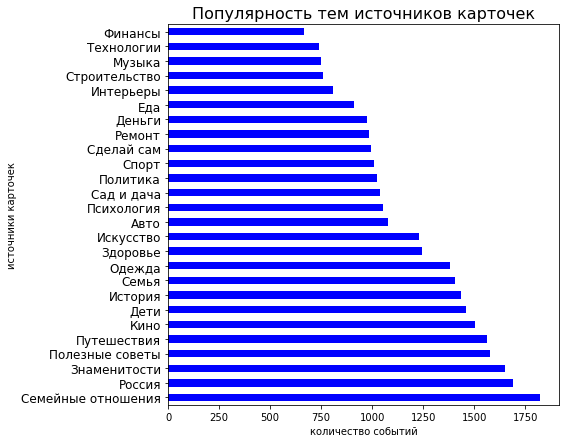

In [13]:
# визуализация
dash_visits['source_topic'].value_counts().sort_values(ascending=False).plot.barh(color="blue",figsize=(7, 7));
plt.title('Популярность тем источников карточек',fontsize=16);
plt.xlabel('количество событий');
plt.ylabel('источники карточек');
plt.yticks(rotation=0,fontsize=12);

Наиболее популярная тема источников - семейные отношения.

In [14]:
# 3
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

In [15]:
dash_visits['age_segment'].nunique()

6

In [16]:
# доли каждой категории
(dash_visits.groupby(dash_visits['age_segment']).size() / 
 len(dash_visits['age_segment'])).to_frame().style.background_gradient('coolwarm')

,0
age_segment,
18-25,0.229501
26-30,0.191088
31-35,0.180582
36-40,0.166043
41-45,0.126947
45+,0.105838


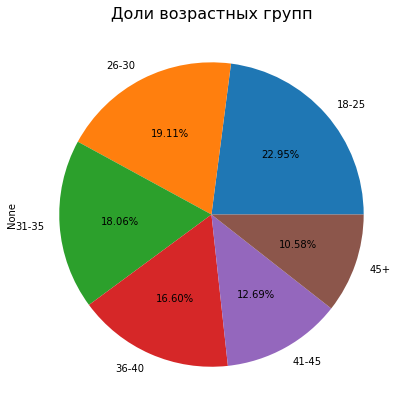

In [17]:
# визуализация
(dash_visits.groupby(dash_visits['age_segment']).size() / 
 len(dash_visits['age_segment'])).plot.pie(autopct = "%0.2f%%",figsize=(7, 7));
plt.title('Доли возрастных групп',fontsize=16);

В датафрейме представлены интересы и активность 6 возрастных категорий, самая многочисленная 18-25.

In [18]:
# 4
dash_visits['dt'].value_counts()

2019-09-24 18:58:00    3383
2019-09-24 18:57:00    3342
2019-09-24 18:56:00    3325
2019-09-24 18:59:00    3317
2019-09-24 18:55:00    3088
2019-09-24 19:00:00    2729
2019-09-24 18:54:00    2551
2019-09-24 18:30:00    1261
2019-09-24 18:32:00    1257
2019-09-24 18:31:00    1253
2019-09-24 18:53:00    1107
2019-09-24 18:29:00    1031
2019-09-24 18:33:00    1007
2019-09-24 18:52:00     719
2019-09-24 18:28:00     615
2019-09-24 18:34:00     576
2019-09-24 18:35:00     184
Name: dt, dtype: int64

In [19]:
dash_visits['dt'].nunique()

17

In [20]:
dash_visits['dt'].max()

Timestamp('2019-09-24 19:00:00')

In [21]:
dash_visits['dt'].min()

Timestamp('2019-09-24 18:28:00')

In [22]:
dash_visits['time'] = pd.to_datetime(dash_visits['dt'], format='%H:%M').dt.time
dash_visits['time']

0        18:32:00
1        18:35:00
2        18:54:00
3        18:55:00
4        18:56:00
           ...   
30740    18:57:00
30741    19:00:00
30742    18:54:00
30743    18:56:00
30744    19:00:00
Name: time, Length: 30745, dtype: object

In [23]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
 6   time          30745 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.6+ MB


Представлены данные за 24 сентября 2019 с 18:28 до 19:00

In [24]:
# 5
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

Максимальный показатель в 'visits' - 371, среднее количество 10

In [25]:
# 6
dash_visits['record_id'].nunique()

30745

Все записи в 'record_id' уникальны.

## Общий вывод.
К исследованию представлены данные за 24 сентября 2019 с 18:28 до 19:00 в виде датафрейма dash_visits, который предоставляет данные следующих групп:

record_id - уникальный номер записи;

item_topic - тема карточки;

source_topic - тема источника;

age_segment - возрастная категория;

dt - фиксация даты и времени визита;

visits - количество посещений.

Всего 30745 записей, пропусков нет, 6 колонок. Типы данных устраивают, замена не требуется.Все записи в 'record_id' уникальны.

В датафрейме представлены интересы и активность 6 возрастных категорий, самая многочисленная 18-25.

Наиболее популярная тема источника - семейные отношения.Всего источников 26.

Наиболее популярная тема карточки- отношения. Всего тематик 25.

In [26]:
# экспорт данных в csv-файл
dash_visits.to_csv('dash_visits.csv', index=False)

In [27]:
# проверка
test = pd.read_csv('dash_visits.csv')

In [28]:
test

,record_id,item_topic,source_topic,age_segment,dt,visits,time
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3,18:32:00
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1,18:35:00
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4,18:54:00
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17,18:55:00
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27,18:56:00
...,...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2,18:57:00
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1,19:00:00
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1,18:54:00
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1,18:56:00
